**Practical 5**

Implement the Continuous Bag of Words (CBOW) Model. Stages can be: 

a. Data preparation 

b. Generate training data 

c. Train model 

d. Output

**References:**
1. Video explaining CBOW using Gensim Word2vec.
How to switch between use of CBOW and Skipgram is also explained
https://www.youtube.com/watch?v=Z1VsHYcNXDI
2. Gensim Documentation:  
https://radimrehurek.com/gensim/models/word2vec.html
https://radimrehurek.com/gensim_3.8.3/models/word2vec.html
3. Blog:  https://ruder.io/word-embeddings-1/index.html#continuousbagofwordscbow
4. Blog:  https://analyticsindiamag.com/the-continuous-bag-of-words-cbow-model-in-nlp-hands-on-implementation-with-codes/
5. CBOW using Gensim: https://www.youtube.com/watch?v=Q2NtCcqmIww

https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/



*   Word Embedding is a language modeling technique used for mapping words to vectors of real numbers.
*   Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc.
* The basic idea of word embedding is words that occur in similar context tend to be closer to each other in vector space.
*  Word2Vec consists of models for generating word embedding
*  These models are shallow two-layer neural networks having one input layer, one hidden layer, and one output layer. Word2Vec utilizes two architectures :
    1.   CBOW (Continuous Bag of Words)
    2.   Skip Gram

**CBOW (Continuous Bag of Words):**
The CBOW model tries to understand the context of the words and takes this as input. It then tries to predict words that are contextually accurate.
1. CBOW model predicts the current word given context words within a specific window. 
2. The input layer contains the context words and the output layer contains the current word. 
3. The hidden layer contains the number of dimensions in which we want to represent the current word present at the output layer. 



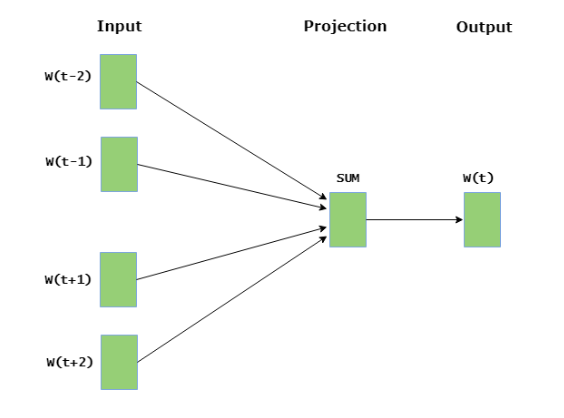



# Step 0: Import Packages
import gensim
from gensim.models import Word2Vec

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec
import re
import bs4 as bs
import urllib.request
import nltk

In [ ]:

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Step 1(a) : Download or collect data. or Prepare Corpus

In [ ]:
scrapped_data=urllib.request.urlopen("https://en.wikipedia.org/wiki/Machine_learning")
article=scrapped_data.read()
paresed_article=bs.BeautifulSoup(article,'lxml')
paragraphs=paresed_article.find_all('p')
article_text=""
for p in paragraphs:
  article_text+=p.text
sentences=article_text

In [ ]:
print(article_text)

Machine learning (ML) is a field of inquiry devoted to understanding and building methods that 'learn', that is, methods that leverage data to improve performance on some set of tasks.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.[3]
A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related

**Instead of lengthy text on wiki, we can try for a small text as well**

In [ ]:
sentences="""Alice 23 opened the door and found that it led into a small 90
passage, not much larger than a rat-hole:  she knelt down and
looked along the passage into the loveliest garden you ever saw.
How she longed to get out of that dark hall, and wander about
among those beds of bright flowers and those cool fountains, but
she could not even get her head through the doorway; `and even if
my head would go through,' (thought) $poor Alice, `it would be of
very little use without my shoulders.  Oh, how I wish
I could shut up like a telescope!  I think I could, if I only
know how to begin.'  For, you see, so many out-of-the-way things
had happened lately, that Alice had begun to think that very few
things indeed were really impossible.

  
"""

In [ ]:
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
print(sentences)

Alice 23 opened the door and found that it led into small 90 passage not much larger than rat hole she knelt down and looked along the passage into the loveliest garden you ever saw How she longed to get out of that dark hall and wander about among those beds of bright flowers and those cool fountains but she could not even get her head through the doorway and even if my head would go through thought poor Alice it would be of very little use without my shoulders Oh how wish could shut up like telescope think could if only know how to begin For you see so many out of the way things had happened lately that Alice had begun to think that very few things indeed were really impossible


# Step 1(b) : Prepare Dataset
1. Remove all special characters and digits
2. Remove all punctuation marks
3. bring all letters to lower case
4. Tokenize the document into sentences and words
5. Remove all stop words.

#Step 2: Generate Training Data

In [ ]:
# remove special characters
sentences = re.sub('[^A-Za-z]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

all_sent=nltk.sent_tokenize(sentences)
all_words=[nltk.word_tokenize(sent) for sent in all_sent]

from nltk.corpus import stopwords
for i in range(len(all_words)):
  all_words[i]=[w for w in all_words[i] if w not in stopwords.words('english')]
data =all_words
data1=data[0]

# Step 3 : Train the model
Use Gensim word2vec for training the model.

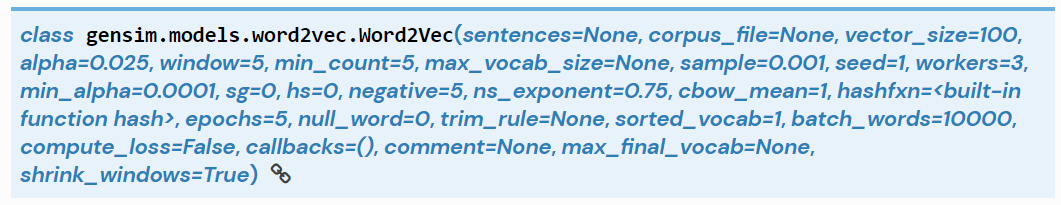

bold text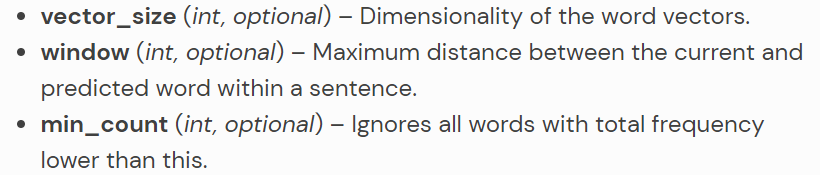

# when 'sg' is set to 1, word2vec is using skipgram and otherwise it is using CBOW
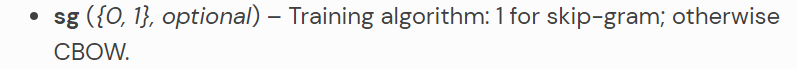

In [ ]:
model1 = gensim.models.Word2Vec(data, min_count = 1,size = 52, window = 5)

# **'wv':**

This object essentially contains the mapping between words and embeddings. 

After training, it can be used directly to query those embeddings in various ways. See the module level docstring for examples.

In [ ]:
vocabulary=model1.wv.vocab
print(vocabulary)

{'alice': <gensim.models.keyedvectors.Vocab object at 0x7f61ecf17890>, 'opened': <gensim.models.keyedvectors.Vocab object at 0x7f61ecf17850>, 'door': <gensim.models.keyedvectors.Vocab object at 0x7f61ecf17950>, 'found': <gensim.models.keyedvectors.Vocab object at 0x7f61ecf17a50>, 'led': <gensim.models.keyedvectors.Vocab object at 0x7f61ecf17ad0>, 'small': <gensim.models.keyedvectors.Vocab object at 0x7f61ecd65490>, 'passage': <gensim.models.keyedvectors.Vocab object at 0x7f61ecd656d0>, 'much': <gensim.models.keyedvectors.Vocab object at 0x7f61ecd65790>, 'larger': <gensim.models.keyedvectors.Vocab object at 0x7f61ecf17c10>, 'rat': <gensim.models.keyedvectors.Vocab object at 0x7f61ecd65450>, 'hole': <gensim.models.keyedvectors.Vocab object at 0x7f61ecd657d0>, 'knelt': <gensim.models.keyedvectors.Vocab object at 0x7f61ecd65850>, 'looked': <gensim.models.keyedvectors.Vocab object at 0x7f61ecd658d0>, 'along': <gensim.models.keyedvectors.Vocab object at 0x7f61ecd65910>, 'loveliest': <gensim.

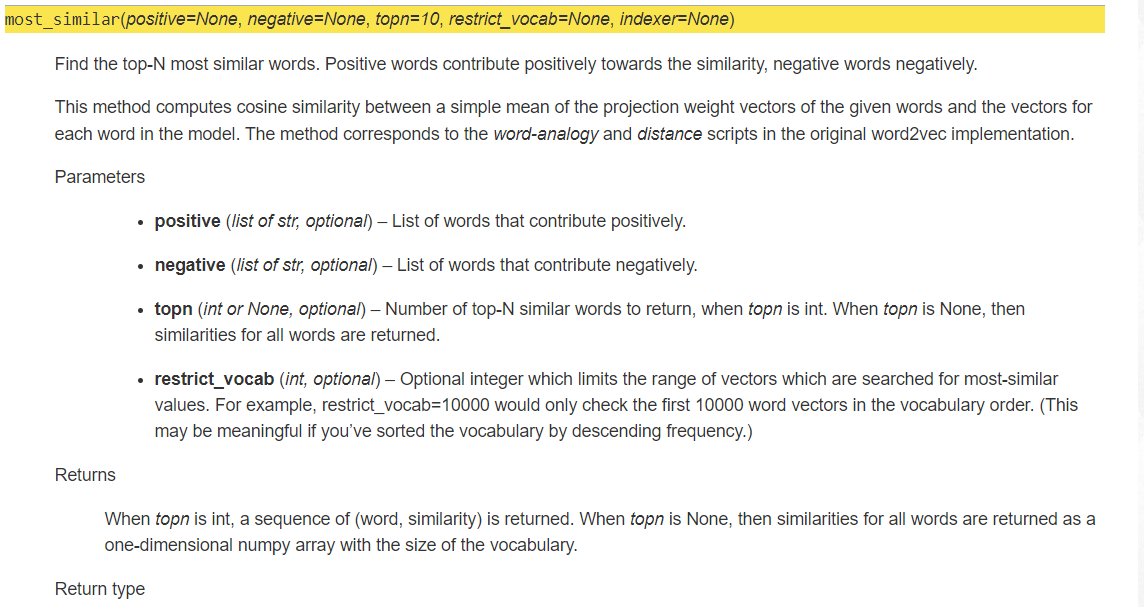

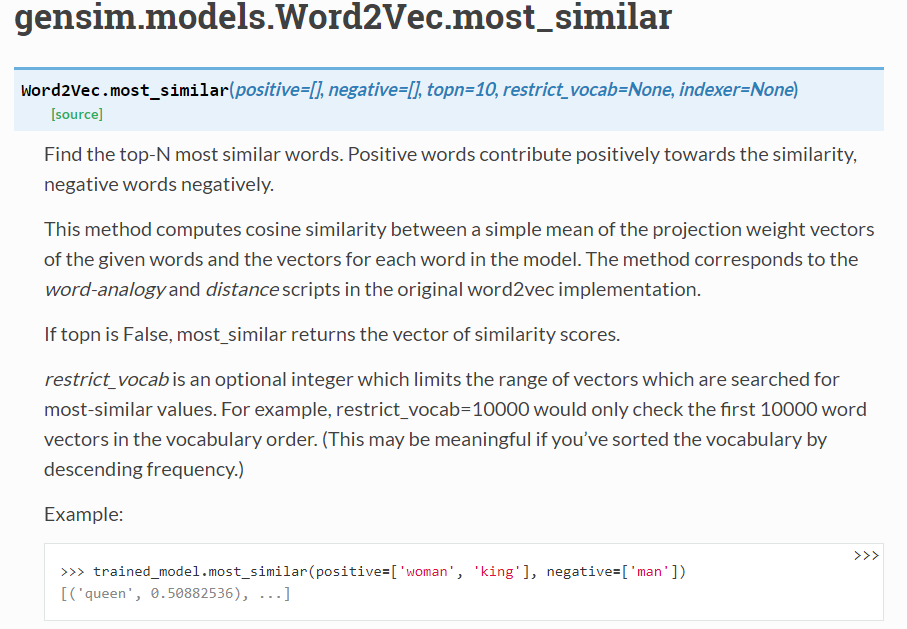

In [ ]:
wrd='door'
#wrd=['subset','machine', 'learning','closely','related']
v1=model1.wv[wrd]
similar_words=model1.wv.most_similar(wrd)
for x in similar_words:
  print(x)

('small', 0.41640156507492065)
('loveliest', 0.27698954939842224)
('garden', 0.1623040735721588)
('opened', 0.13954795897006989)
('use', 0.12685680389404297)
('along', 0.09685172885656357)
('impossible', 0.09381072968244553)
('like', 0.09209636598825455)
('beds', 0.08821111917495728)
('saw', 0.08778004348278046)


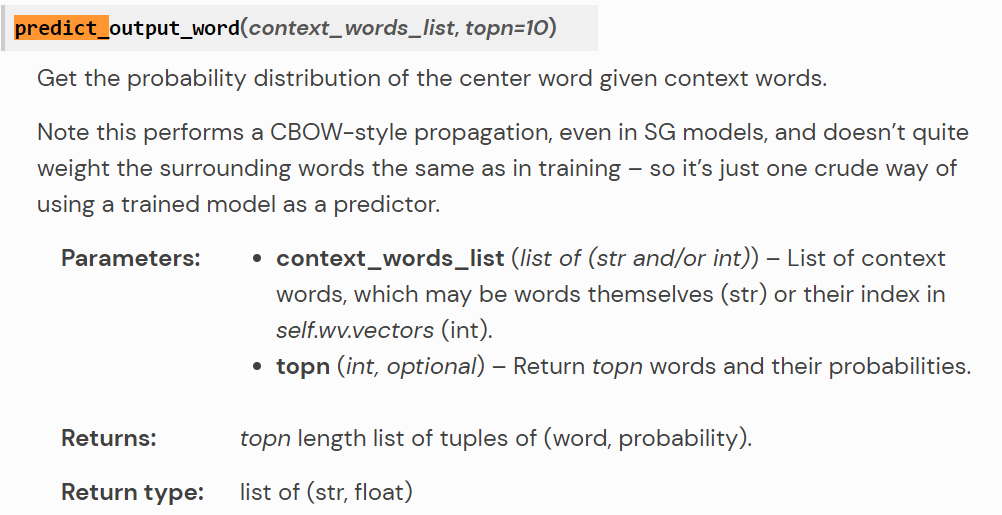

# **Prepare Context_words_list**

In [ ]:
#print(data)

dat = []
for i in range(2, len(data) - 2):
    context = [data1[i - 2], data1[i - 1], data1[i+1], data1[i + 2]]
    target = data1[i]
    dat.append((context, target))
print(dat[:5])
#print(dat[1][0])

[]


In [ ]:
#for val in dat:
 # print(val[0],val[1])
i=3
print(dat[i][0],dat[i][1])
print(model1.predict_output_word(dat[i][0]))

IndexError: ignored

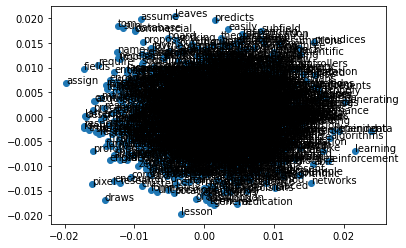

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
   pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()